In [1]:
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
from torch.autograd import Variable
import transforms as transforms
from skimage import io
from skimage.transform import resize
from models import *
import cv2 as cv
import dlib
import time
from console_progressbar import ProgressBar

In [2]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
])

def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return x, y, w, h

def apply_offsets(face_coordinates, offsets):
    x, y, width, height = face_coordinates
    x_off, y_off = offsets
    return x - x_off, x + width + x_off, y - y_off, y + height + y_off

def get_color(emotion, prob):
    if emotion.lower() == 'Angry':
        color = prob * np.asarray((0, 0, 255))
    elif emotion.lower() == 'Disgust':
        color = prob * np.asarray((255, 0, 0))
    elif emotion.lower() == 'Fear':
        color = prob * np.asarray((0, 255, 255))
    elif emotion.lower() == 'Happy':
        color = prob * np.asarray((255, 255, 0))
    elif emotion.lower() == 'Sad':
        color = prob * np.asarray((255, 255, 255))
    elif emotion.lower() == 'Surprise':
        color = prob * np.asarray((255, 0, 255))
    else:
        color = prob * np.asarray((0, 255, 0))
    return color

def draw_bounding_box(image, coordinates, color):
    x, y, w, h = coordinates
    cv.rectangle(image, (x, y), (x + w, y + h), color, 2)
    
def draw_text(image, coordinates, text, color, x_offset=0, y_offset=0,
              font_scale=2, thickness=2):
    x, y = coordinates[:2]
    cv.putText(image, text, (x + x_offset, y + y_offset),
                cv.FONT_HERSHEY_SIMPLEX,
                font_scale, color, thickness, cv.LINE_AA)

def draw_str(dst, target, s):
    x, y = target
    cv.putText(dst, s, (x + 1, y + 1), cv.FONT_HERSHEY_PLAIN, 1.0, (0, 0, 0), thickness=2, lineType=cv.LINE_AA)
    cv.putText(dst, s, (x, y), cv.FONT_HERSHEY_PLAIN, 1.0, (255, 255, 255), lineType=cv.LINE_AA)
    
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

(341, 341, 3)


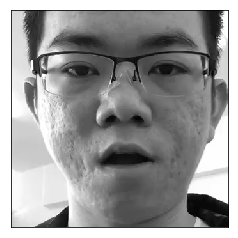

(341, 341)
(44, 44)
(44, 44, 3)


/home/ysz/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


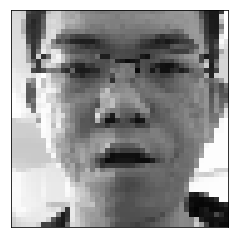

Neutral  0.99504
fps: 0.43
Processing video |--------------------------------------------------| 0.000% 

/home/ysz/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


(341, 341, 3)


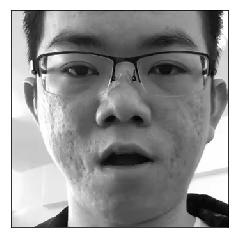

(341, 341)
(44, 44)
(44, 44, 3)


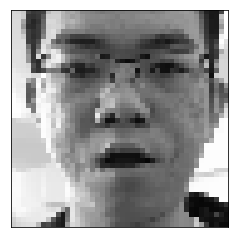

Neutral  0.98829
fps: 1.63
Processing video |=====---------------------------------------------| 10.000% (341, 341, 3)


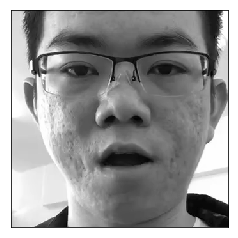

(341, 341)
(44, 44)
(44, 44, 3)


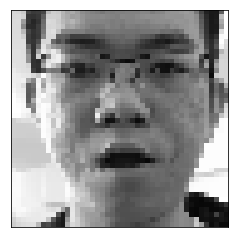

Neutral  0.98702
fps: 1.31
Processing video |==========----------------------------------------| 20.000% (341, 341, 3)


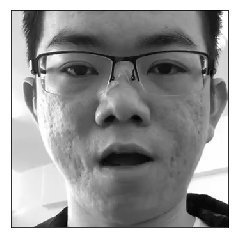

(341, 341)
(44, 44)
(44, 44, 3)


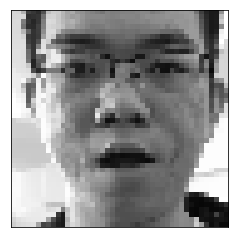

Neutral  0.99424
fps: 1.38
Processing video |===============-----------------------------------| 30.000% (341, 341, 3)


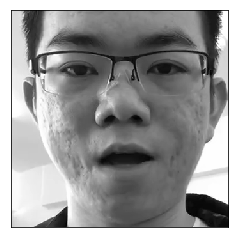

(341, 341)
(44, 44)
(44, 44, 3)


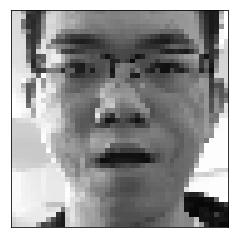

Neutral  0.99369
fps: 1.37
Processing video |====================------------------------------| 40.000% (341, 341, 3)


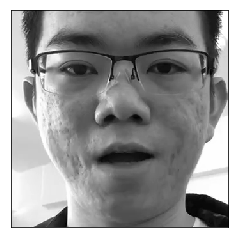

(341, 341)
(44, 44)
(44, 44, 3)


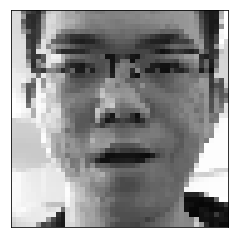

Neutral  0.99447
fps: 1.51
Processing video |=========================-------------------------| 50.000% (341, 341, 3)


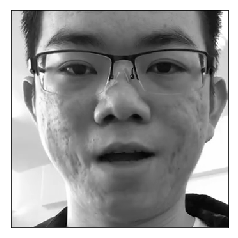

(341, 341)
(44, 44)
(44, 44, 3)


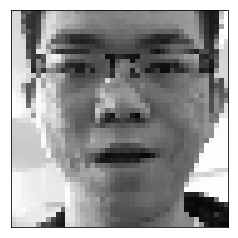

Neutral  0.99326
fps: 1.25
Processing video |==============================--------------------| 60.000% (341, 341, 3)


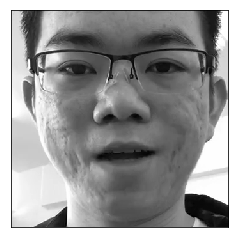

(341, 341)
(44, 44)
(44, 44, 3)


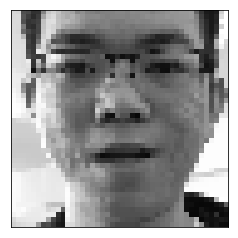

Neutral  0.99096
fps: 1.13
Processing video |===================================---------------| 70.000% (341, 341, 3)


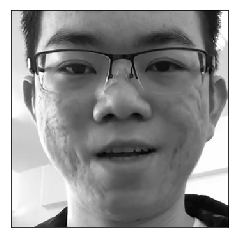

(341, 341)
(44, 44)
(44, 44, 3)


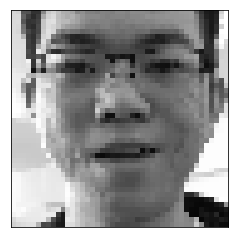

Neutral  0.99605
fps: 0.86
Processing video |========================================----------| 80.000% (341, 341, 3)


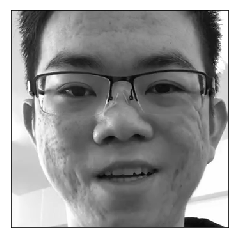

(341, 341)
(44, 44)
(44, 44, 3)


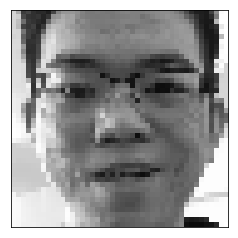

Neutral  0.70319
fps: 1.26
Processing video |=============================================-----| 90.000% (341, 341, 3)


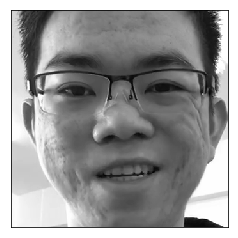

(341, 341)
(44, 44)
(44, 44, 3)


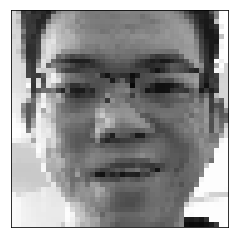

Neutral  0.60012
fps: 1.34
Processing video |==================================================| 100.000% 
(341, 341, 3)


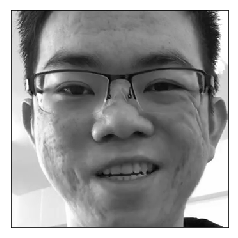

(341, 341)
(44, 44)
(44, 44, 3)


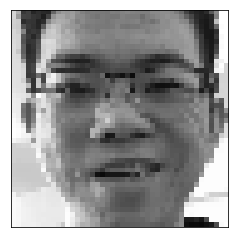

Neutral  0.85813
fps: 1.35
Processing video |=======================================================| 110.000% (341, 341, 3)


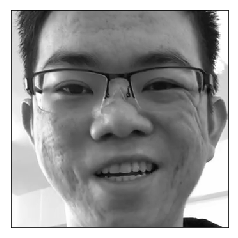

(341, 341)
(44, 44)
(44, 44, 3)


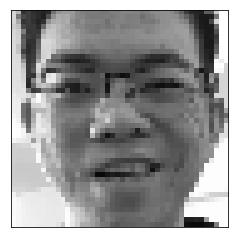

Neutral  0.7556
fps: 1.18
Processing video |============================================================| 120.000% (341, 341, 3)


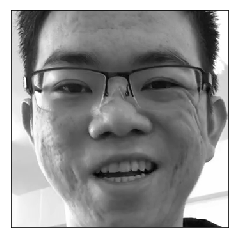

(341, 341)
(44, 44)
(44, 44, 3)


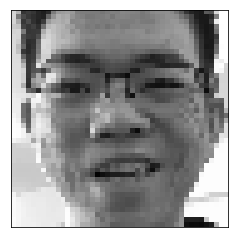

Neutral  0.80497
fps: 1.17
Processing video |=================================================================| 130.000% (341, 341, 3)


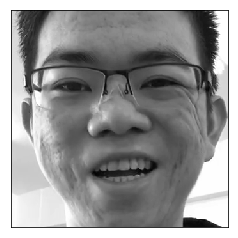

(341, 341)
(44, 44)
(44, 44, 3)


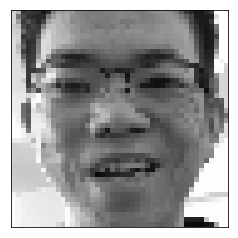

Neutral  0.78379
fps: 1.20
Processing video |======================================================================| 140.000% (341, 341, 3)


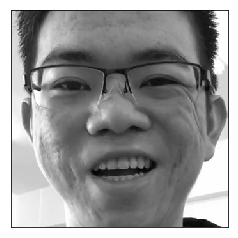

(341, 341)
(44, 44)
(44, 44, 3)


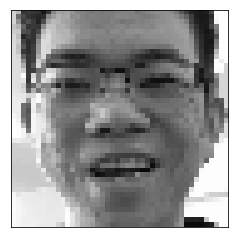

Happy  0.77451
fps: 1.23
Processing video |===========================================================================| 150.000% (341, 341, 3)


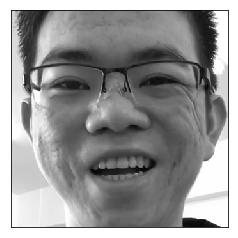

(341, 341)
(44, 44)
(44, 44, 3)


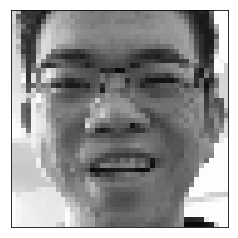

Happy  0.99684
fps: 1.79
Processing video |================================================================================| 160.000% (341, 341, 3)


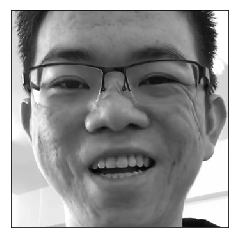

(341, 341)
(44, 44)
(44, 44, 3)


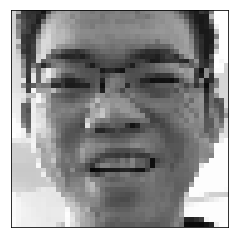

Happy  0.99717
fps: 1.53
Processing video |=====================================================================================| 170.000% (341, 341, 3)


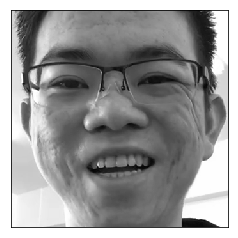

(341, 341)
(44, 44)
(44, 44, 3)


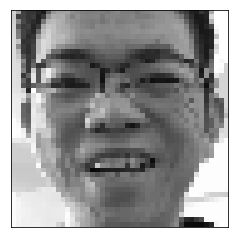

Happy  0.99933
fps: 1.16
Processing video |==========================================================================================| 180.000% (341, 341, 3)


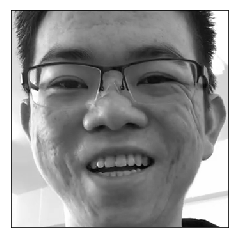

(341, 341)
(44, 44)
(44, 44, 3)


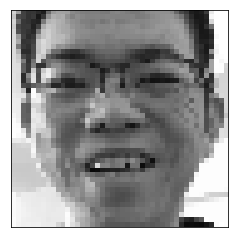

Happy  0.99794
fps: 1.39
Processing video |===============================================================================================| 190.000% (288, 287, 3)


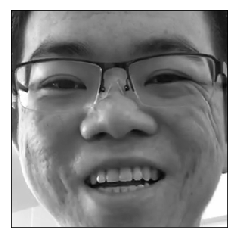

(288, 287)
(44, 44)
(44, 44, 3)


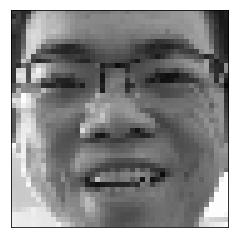

Happy  0.99743
fps: 1.25
Processing video |====================================================================================================| 200.000% (288, 287, 3)


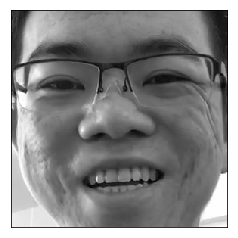

(288, 287)
(44, 44)
(44, 44, 3)


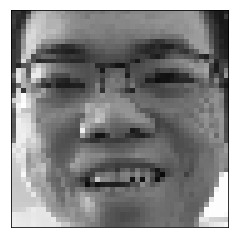

Happy  0.9953
fps: 1.18
Processing video |=========================================================================================================| 210.000% (288, 287, 3)


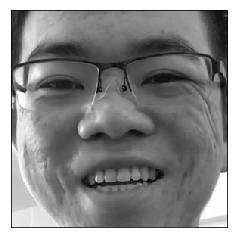

(288, 287)
(44, 44)
(44, 44, 3)


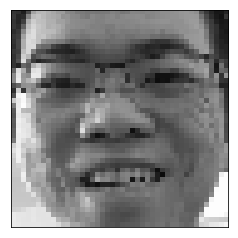

Happy  0.99977
fps: 1.48
Processing video |==============================================================================================================| 220.000% (288, 287, 3)


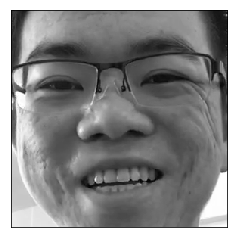

(288, 287)
(44, 44)
(44, 44, 3)


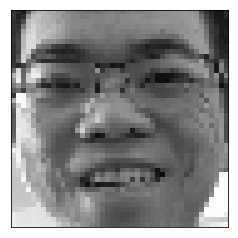

Happy  0.99987
fps: 1.60
Processing video |===================================================================================================================| 230.000% (288, 287, 3)


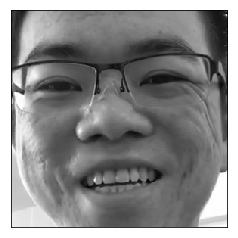

(288, 287)
(44, 44)
(44, 44, 3)


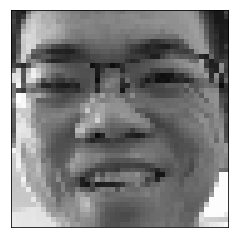

Happy  0.99895
fps: 1.28
Processing video |========================================================================================================================| 240.000% (288, 287, 3)


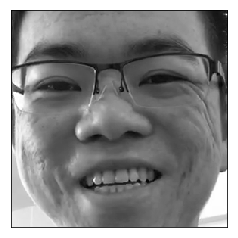

(288, 287)
(44, 44)
(44, 44, 3)


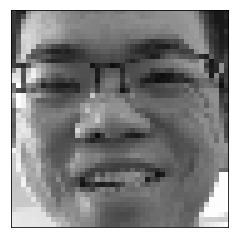

Happy  0.99791
fps: 1.27
Processing video |=============================================================================================================================| 250.000% (288, 287, 3)


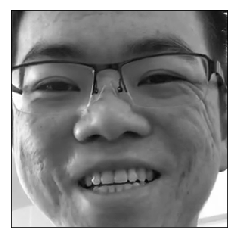

(288, 287)
(44, 44)
(44, 44, 3)


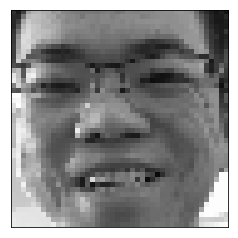

Happy  0.99849
fps: 1.27
Processing video |==================================================================================================================================| 260.000% (288, 287, 3)


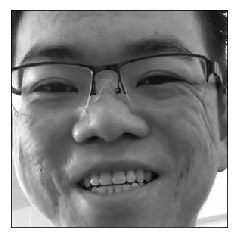

(288, 287)
(44, 44)
(44, 44, 3)


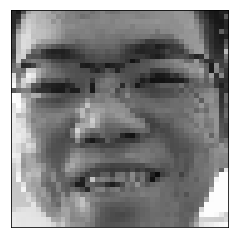

Neutral  0.6586
fps: 1.38
Processing video |=======================================================================================================================================| 270.000% (288, 287, 3)


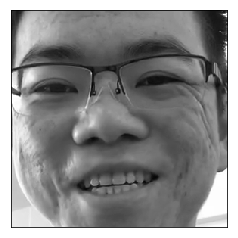

(288, 287)
(44, 44)
(44, 44, 3)


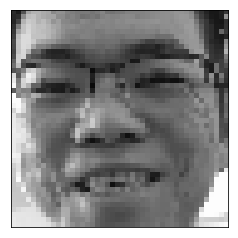

Neutral  0.99185
fps: 1.45
Processing video |============================================================================================================================================| 280.000% (288, 287, 3)


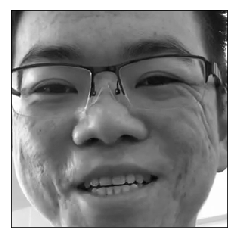

(288, 287)
(44, 44)
(44, 44, 3)


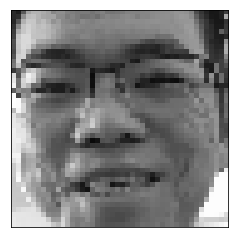

Neutral  0.99683
fps: 1.21
Processing video |=================================================================================================================================================| 290.000% (341, 341, 3)


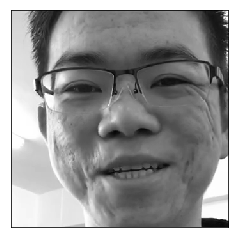

(341, 341)
(44, 44)
(44, 44, 3)


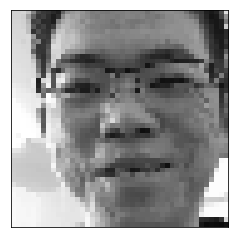

Neutral  0.83335
fps: 1.06
Processing video |======================================================================================================================================================| 300.000% (341, 341, 3)


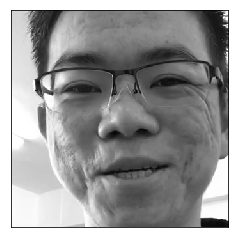

(341, 341)
(44, 44)
(44, 44, 3)


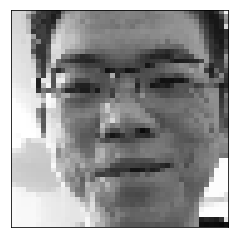

Neutral  0.88863
fps: 1.29
Processing video |===========================================================================================================================================================| 310.000% (341, 341, 3)


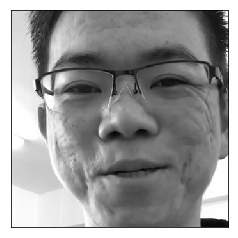

(341, 341)
(44, 44)
(44, 44, 3)


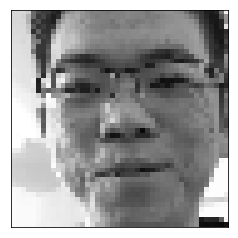

Neutral  0.98164
fps: 1.34
Processing video |================================================================================================================================================================| 320.000% (341, 341, 3)


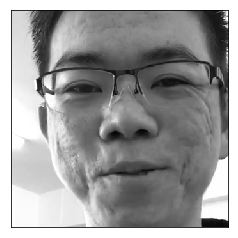

(341, 341)
(44, 44)
(44, 44, 3)


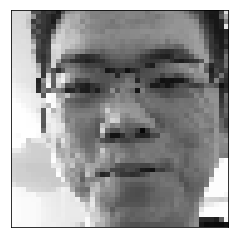

Neutral  0.99484
fps: 1.12
Processing video |=====================================================================================================================================================================| 330.000% (288, 287, 3)


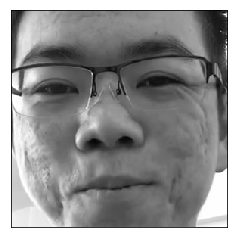

(288, 287)
(44, 44)
(44, 44, 3)


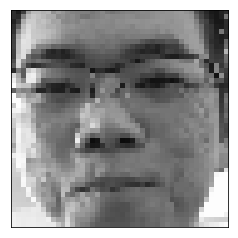

Neutral  0.99699
fps: 1.13
Processing video |==========================================================================================================================================================================| 340.000% (288, 287, 3)


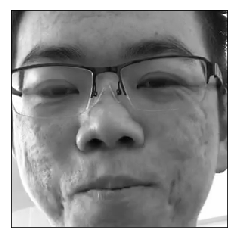

(288, 287)
(44, 44)
(44, 44, 3)


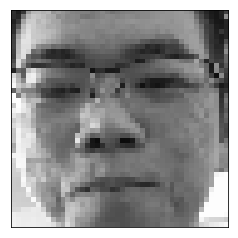

Neutral  0.99129
fps: 1.26
Processing video |===============================================================================================================================================================================| 350.000% (288, 287, 3)


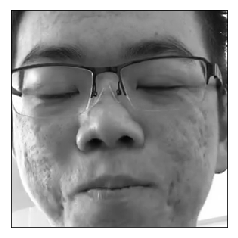

(288, 287)
(44, 44)
(44, 44, 3)


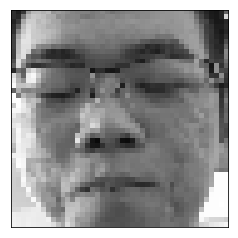

Neutral  0.99755
fps: 0.99
Processing video |====================================================================================================================================================================================| 360.000% (288, 287, 3)


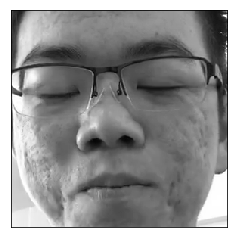

(288, 287)
(44, 44)
(44, 44, 3)


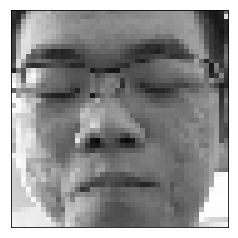

Neutral  0.99449
fps: 1.42
Processing video |=========================================================================================================================================================================================| 370.000% (288, 287, 3)


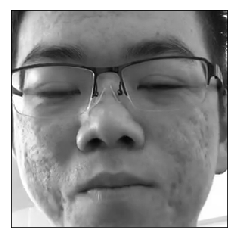

(288, 287)
(44, 44)
(44, 44, 3)


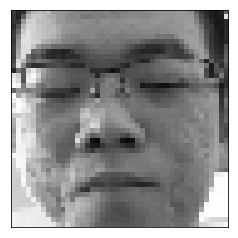

Angry  0.58017
fps: 1.60
Processing video |==============================================================================================================================================================================================| 380.000% (288, 287, 3)


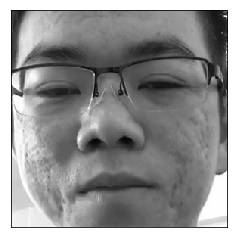

(288, 287)
(44, 44)
(44, 44, 3)


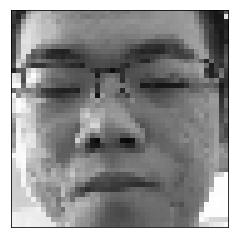

Neutral  0.98328
fps: 1.49
Processing video |===================================================================================================================================================================================================| 390.000% (288, 287, 3)


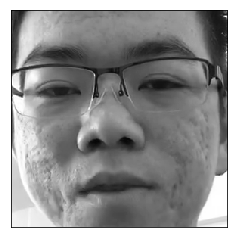

(288, 287)
(44, 44)
(44, 44, 3)


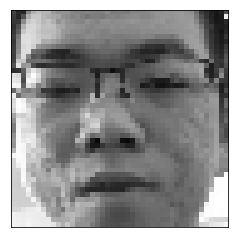

Neutral  0.99423
fps: 1.34
Processing video |========================================================================================================================================================================================================| 400.000% (341, 341, 3)


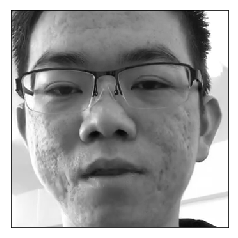

(341, 341)
(44, 44)
(44, 44, 3)


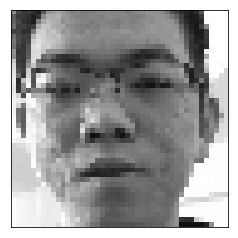

Neutral  0.92536
fps: 1.24
Processing video |=============================================================================================================================================================================================================| 410.000% (287, 287, 3)


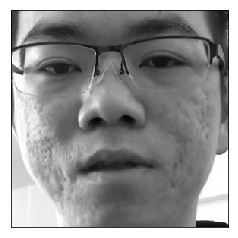

(287, 287)
(44, 44)
(44, 44, 3)


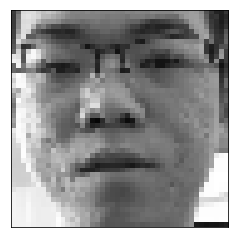

Neutral  0.99835
fps: 1.27
Processing video |==================================================================================================================================================================================================================| 420.000% (287, 287, 3)


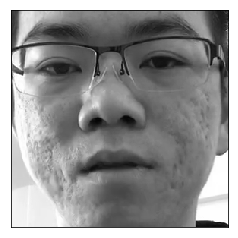

(287, 287)
(44, 44)
(44, 44, 3)


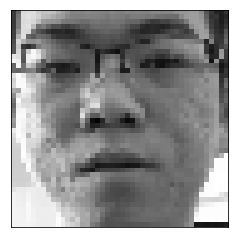

Neutral  0.98062
fps: 1.33
Processing video |=======================================================================================================================================================================================================================| 430.000% (287, 287, 3)


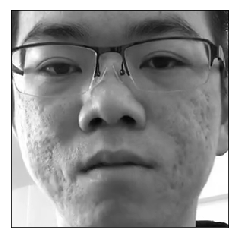

(287, 287)
(44, 44)
(44, 44, 3)


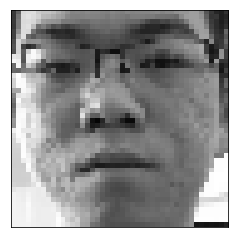

Neutral  0.8634
fps: 1.49
Processing video |============================================================================================================================================================================================================================| 440.000% (287, 287, 3)


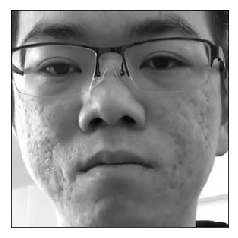

(287, 287)
(44, 44)
(44, 44, 3)


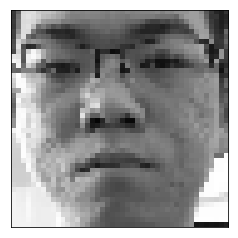

Neutral  0.97892
fps: 1.20
Processing video |=================================================================================================================================================================================================================================| 450.000% (287, 287, 3)


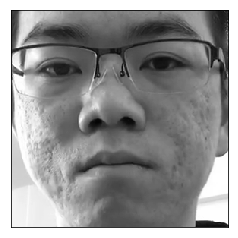

(287, 287)
(44, 44)
(44, 44, 3)


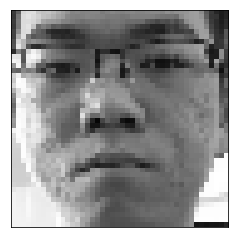

Neutral  0.84093
fps: 1.17
Processing video |======================================================================================================================================================================================================================================| 460.000% (287, 287, 3)


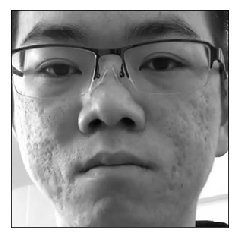

(287, 287)
(44, 44)
(44, 44, 3)


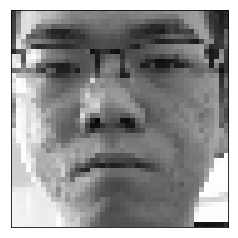

Neutral  0.81778
fps: 1.46
Processing video |===========================================================================================================================================================================================================================================| 470.000% (287, 287, 3)


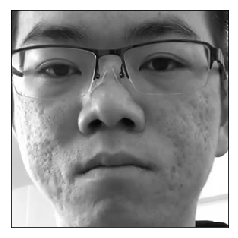

(287, 287)
(44, 44)
(44, 44, 3)


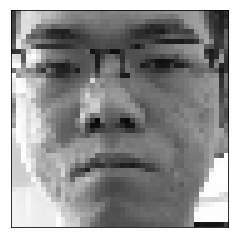

Neutral  0.9429
fps: 1.34
Processing video |================================================================================================================================================================================================================================================| 480.000% (287, 287, 3)


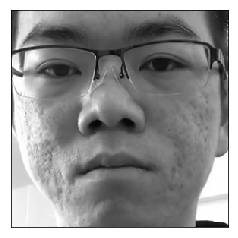

(287, 287)
(44, 44)
(44, 44, 3)


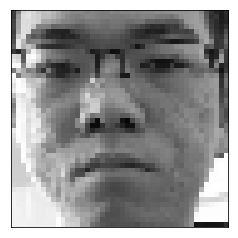

Neutral  0.86431
fps: 1.27
Processing video |=====================================================================================================================================================================================================================================================| 490.000% (287, 287, 3)


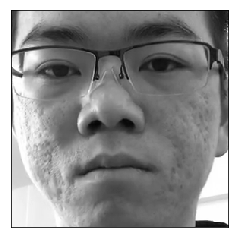

(287, 287)
(44, 44)
(44, 44, 3)


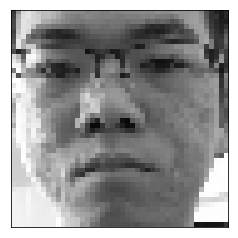

Neutral  0.72531
fps: 1.47
Processing video |==========================================================================================================================================================================================================================================================| 500.000% (287, 287, 3)


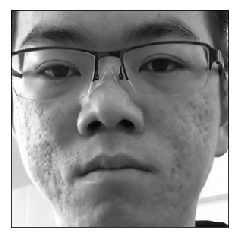

(287, 287)
(44, 44)
(44, 44, 3)


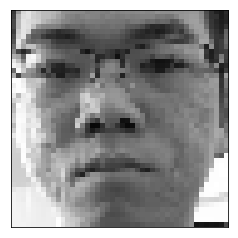

Neutral  0.54281
fps: 1.20
Processing video |===============================================================================================================================================================================================================================================================| 510.000% (287, 287, 3)


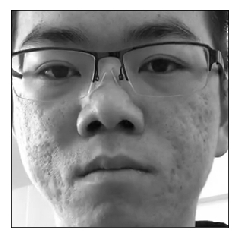

(287, 287)
(44, 44)
(44, 44, 3)


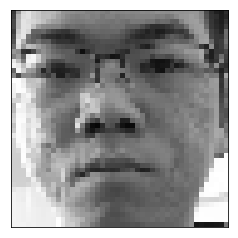

Neutral  0.94446
fps: 1.35
Processing video |====================================================================================================================================================================================================================================================================| 520.000% (287, 287, 3)


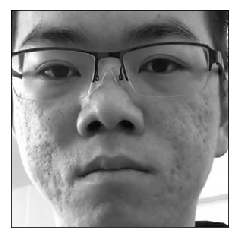

(287, 287)
(44, 44)
(44, 44, 3)


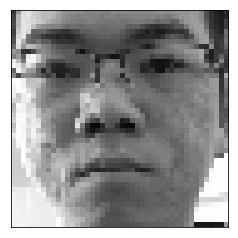

Neutral  0.93829
fps: 1.40
Processing video |=========================================================================================================================================================================================================================================================================| 530.000% (287, 287, 3)


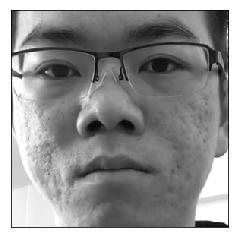

(287, 287)
(44, 44)
(44, 44, 3)


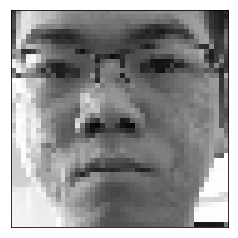

Neutral  0.92582
fps: 1.38
Processing video |==============================================================================================================================================================================================================================================================================| 540.000% (287, 287, 3)


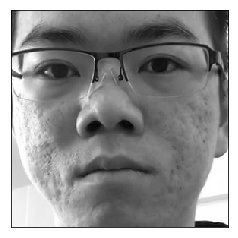

(287, 287)
(44, 44)
(44, 44, 3)


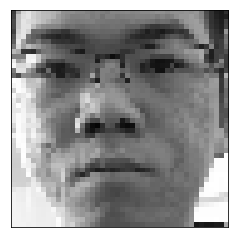

Neutral  0.92657
fps: 1.31
Processing video |===================================================================================================================================================================================================================================================================================| 550.000% (287, 287, 3)


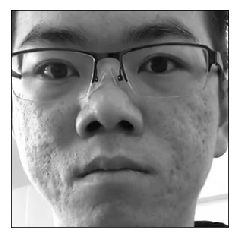

(287, 287)
(44, 44)
(44, 44, 3)


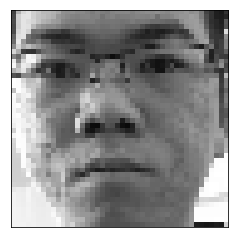

Neutral  0.86969
fps: 1.37
Processing video |========================================================================================================================================================================================================================================================================================| 560.000% (341, 341, 3)


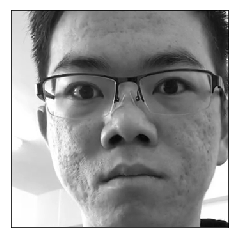

(341, 341)
(44, 44)
(44, 44, 3)


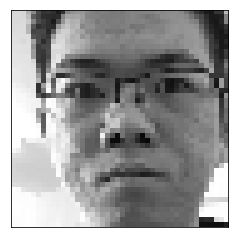

Neutral  0.96987
fps: 1.32
Processing video |=============================================================================================================================================================================================================================================================================================| 570.000% (341, 341, 3)


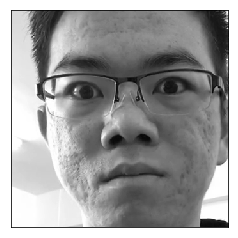

(341, 341)
(44, 44)
(44, 44, 3)


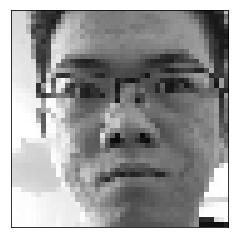

Neutral  0.96969
fps: 1.41
Processing video |==================================================================================================================================================================================================================================================================================================| 580.000% (341, 341, 3)


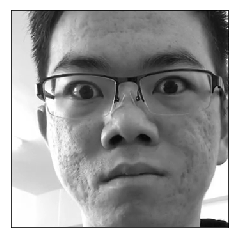

(341, 341)
(44, 44)
(44, 44, 3)


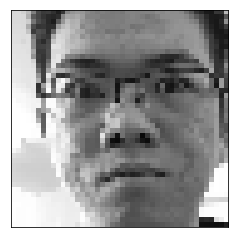

Neutral  0.9571
fps: 1.34
Processing video |=======================================================================================================================================================================================================================================================================================================| 590.000% (287, 287, 3)


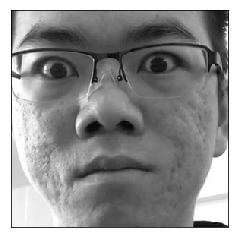

(287, 287)
(44, 44)
(44, 44, 3)


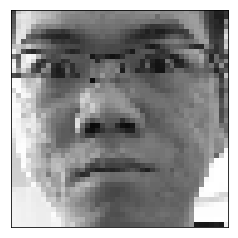

Neutral  0.98895
fps: 1.28
Processing video |============================================================================================================================================================================================================================================================================================================| 600.000% (341, 341, 3)


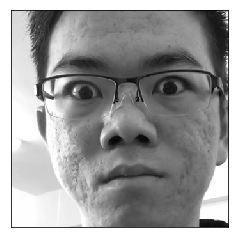

(341, 341)
(44, 44)
(44, 44, 3)


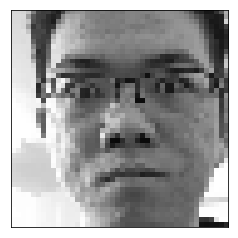

Neutral  0.95141
fps: 1.50
Processing video |=================================================================================================================================================================================================================================================================================================================| 610.000% (287, 287, 3)


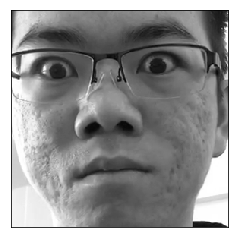

(287, 287)
(44, 44)
(44, 44, 3)


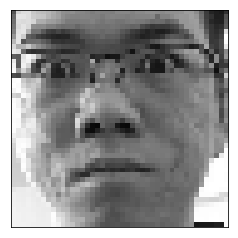

Neutral  0.75651
fps: 1.42
Processing video |======================================================================================================================================================================================================================================================================================================================| 620.000% (287, 287, 3)


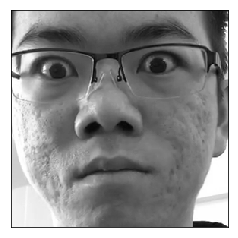

(287, 287)
(44, 44)
(44, 44, 3)


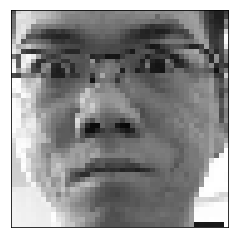

Neutral  0.52043
fps: 1.13
Processing video |===========================================================================================================================================================================================================================================================================================================================| 630.000% (341, 341, 3)


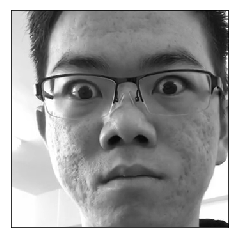

(341, 341)
(44, 44)
(44, 44, 3)


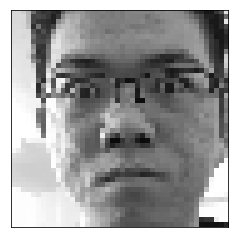

Neutral  0.99169
fps: 1.30
Processing video |================================================================================================================================================================================================================================================================================================================================| 640.000% (341, 341, 3)


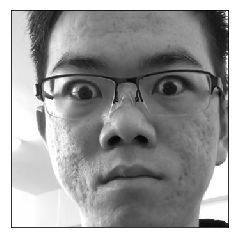

(341, 341)
(44, 44)
(44, 44, 3)


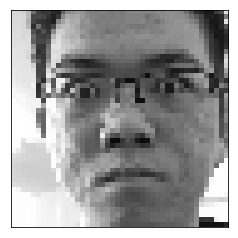

Neutral  0.94095
fps: 1.35
Processing video |=====================================================================================================================================================================================================================================================================================================================================| 650.000% (341, 341, 3)


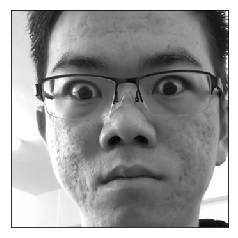

(341, 341)
(44, 44)
(44, 44, 3)


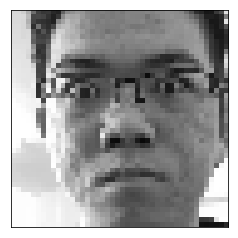

Neutral  0.97411
fps: 1.28
Processing video |==========================================================================================================================================================================================================================================================================================================================================| 660.000% (341, 341, 3)


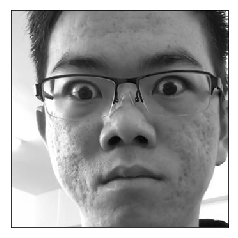

(341, 341)
(44, 44)
(44, 44, 3)


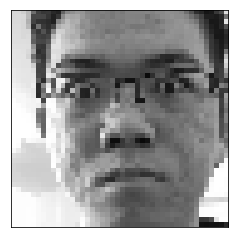

Neutral  0.98835
fps: 1.27
Processing video |===============================================================================================================================================================================================================================================================================================================================================| 670.000% (287, 287, 3)


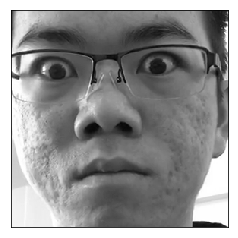

(287, 287)
(44, 44)
(44, 44, 3)


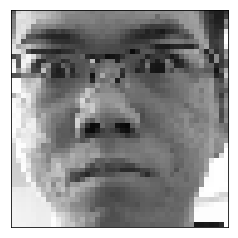

Neutral  0.78869
fps: 0.87
Processing video |====================================================================================================================================================================================================================================================================================================================================================| 680.000% (341, 341, 3)


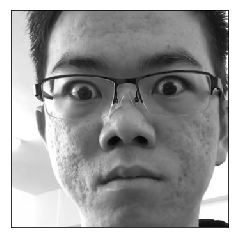

(341, 341)
(44, 44)
(44, 44, 3)


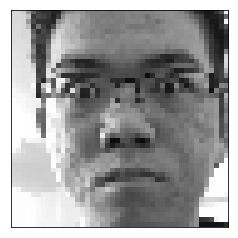

Neutral  0.99423
fps: 1.18
Processing video |=========================================================================================================================================================================================================================================================================================================================================================| 690.000% (341, 341, 3)


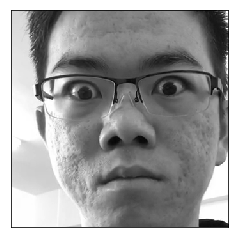

(341, 341)
(44, 44)
(44, 44, 3)


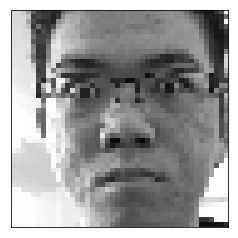

Neutral  0.99092
fps: 1.30
Processing video |==============================================================================================================================================================================================================================================================================================================================================================| 700.000% (341, 341, 3)


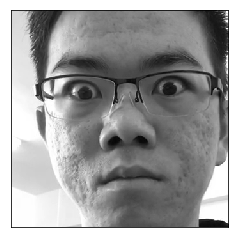

(341, 341)
(44, 44)
(44, 44, 3)


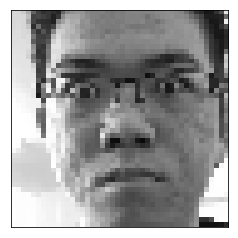

Neutral  0.99591
fps: 1.27
Processing video |===================================================================================================================================================================================================================================================================================================================================================================| 710.000% (287, 287, 3)


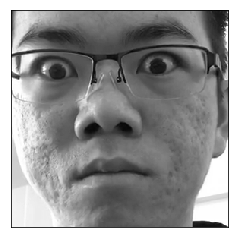

(287, 287)
(44, 44)
(44, 44, 3)


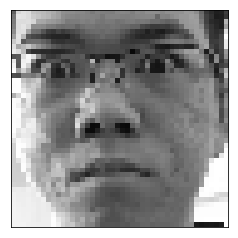

Neutral  0.70616
fps: 1.13
Processing video |========================================================================================================================================================================================================================================================================================================================================================================| 720.000% (341, 341, 3)


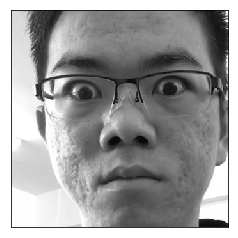

(341, 341)
(44, 44)
(44, 44, 3)


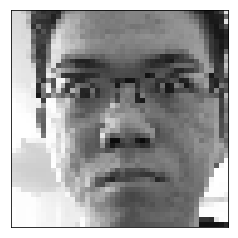

Neutral  0.9971
fps: 1.11
Processing video |=============================================================================================================================================================================================================================================================================================================================================================================| 730.000% (287, 287, 3)


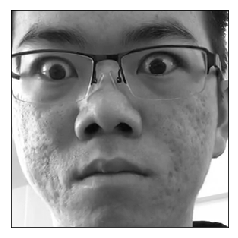

(287, 287)
(44, 44)
(44, 44, 3)


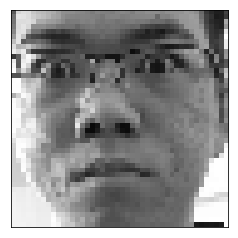

Angry  0.52875
fps: 0.87
Processing video |==================================================================================================================================================================================================================================================================================================================================================================================| 740.000% (341, 341, 3)


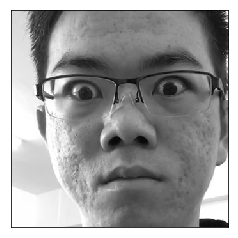

(341, 341)
(44, 44)
(44, 44, 3)


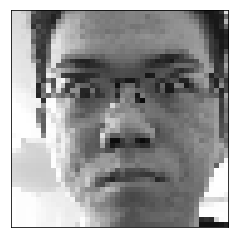

Neutral  0.99605
fps: 1.65
Processing video |=======================================================================================================================================================================================================================================================================================================================================================================================| 750.000% (287, 287, 3)


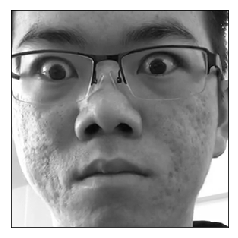

(287, 287)
(44, 44)
(44, 44, 3)


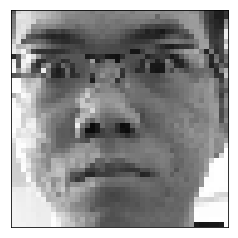

Neutral  0.53081
fps: 1.28
Processing video |============================================================================================================================================================================================================================================================================================================================================================================================| 760.000% (341, 341, 3)


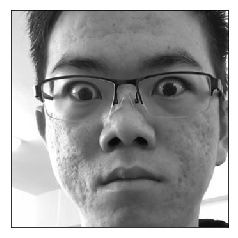

(341, 341)
(44, 44)
(44, 44, 3)


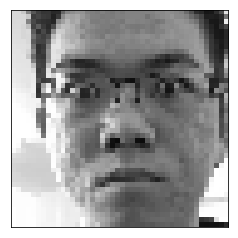

Neutral  0.96705
fps: 1.32
Processing video |=================================================================================================================================================================================================================================================================================================================================================================================================| 770.000% (341, 341, 3)


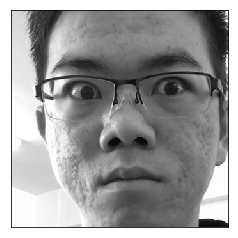

(341, 341)
(44, 44)
(44, 44, 3)


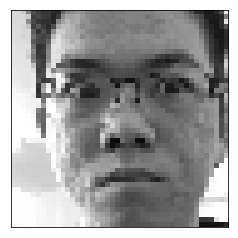

Neutral  0.99524
fps: 1.24
Processing video |======================================================================================================================================================================================================================================================================================================================================================================================================| 780.000% (341, 341, 3)


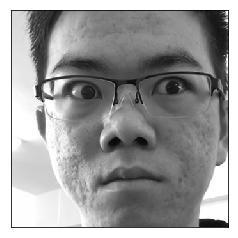

(341, 341)
(44, 44)
(44, 44, 3)


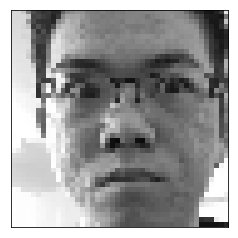

Neutral  0.99014
fps: 1.28
Processing video |===========================================================================================================================================================================================================================================================================================================================================================================================================| 790.000% (341, 341, 3)


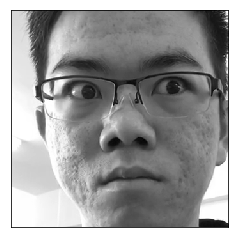

(341, 341)
(44, 44)
(44, 44, 3)


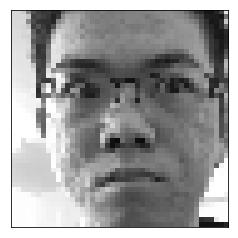

Neutral  0.94861
fps: 1.18
Processing video |================================================================================================================================================================================================================================================================================================================================================================================================================| 800.000% (341, 341, 3)


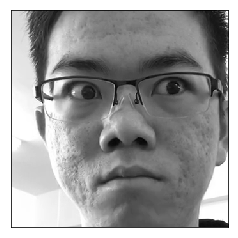

(341, 341)
(44, 44)
(44, 44, 3)


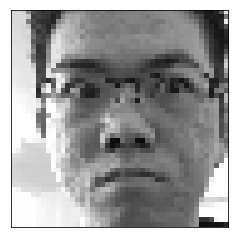

Neutral  0.89051
fps: 0.97
Processing video |=====================================================================================================================================================================================================================================================================================================================================================================================================================| 810.000% (341, 341, 3)


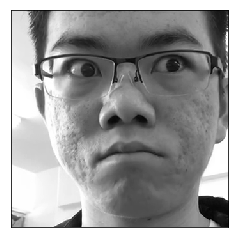

(341, 341)
(44, 44)
(44, 44, 3)


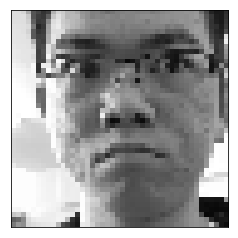

Angry  0.86848
fps: 1.48
Processing video |==========================================================================================================================================================================================================================================================================================================================================================================================================================| 820.000% (341, 341, 3)


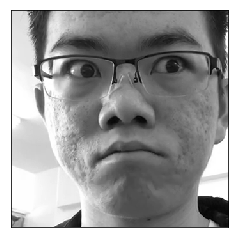

(341, 341)
(44, 44)
(44, 44, 3)


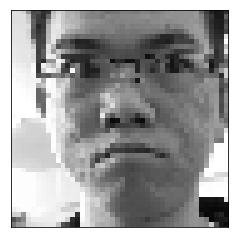

Angry  0.51714
fps: 1.39
Processing video |===============================================================================================================================================================================================================================================================================================================================================================================================================================| 830.000% (341, 341, 3)


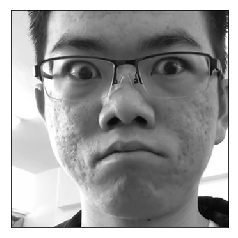

(341, 341)
(44, 44)
(44, 44, 3)


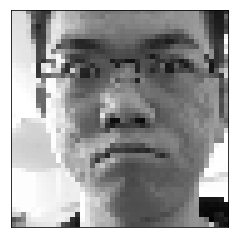

Neutral  0.71271
fps: 1.45
Processing video |====================================================================================================================================================================================================================================================================================================================================================================================================================================| 840.000% (287, 287, 3)


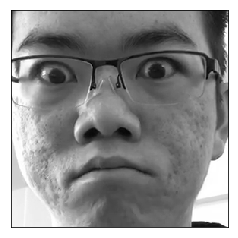

(287, 287)
(44, 44)
(44, 44, 3)


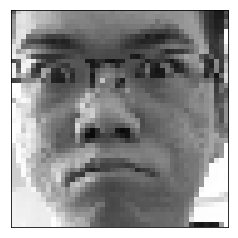

Neutral  0.65824
fps: 1.24
Processing video |=========================================================================================================================================================================================================================================================================================================================================================================================================================================| 850.000% (341, 341, 3)


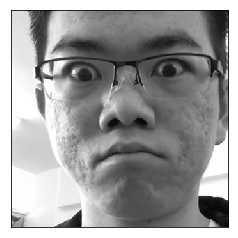

(341, 341)
(44, 44)
(44, 44, 3)


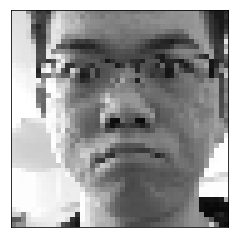

Neutral  0.89651
fps: 1.18
Processing video |==============================================================================================================================================================================================================================================================================================================================================================================================================================================| 860.000% (341, 341, 3)


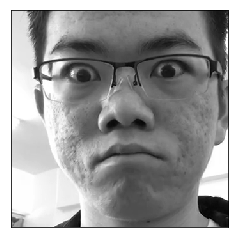

(341, 341)
(44, 44)
(44, 44, 3)


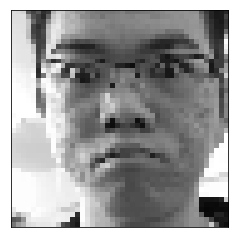

Neutral  0.99821
fps: 1.14
Processing video |===================================================================================================================================================================================================================================================================================================================================================================================================================================================| 870.000% (341, 341, 3)


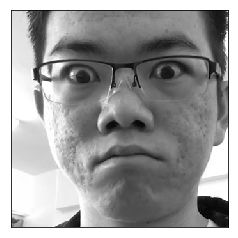

(341, 341)
(44, 44)
(44, 44, 3)


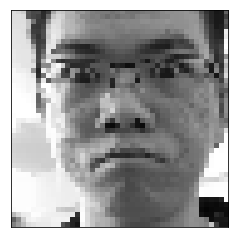

Neutral  0.98978
fps: 1.42
Processing video |========================================================================================================================================================================================================================================================================================================================================================================================================================================================| 880.000% (341, 341, 3)


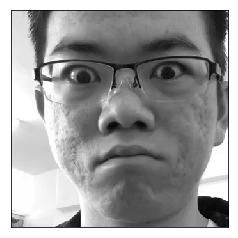

(341, 341)
(44, 44)
(44, 44, 3)


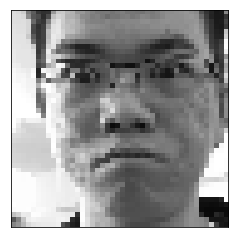

Neutral  0.9928
fps: 1.55
Processing video |=============================================================================================================================================================================================================================================================================================================================================================================================================================================================| 890.000% (341, 341, 3)


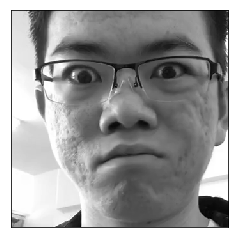

(341, 341)
(44, 44)
(44, 44, 3)


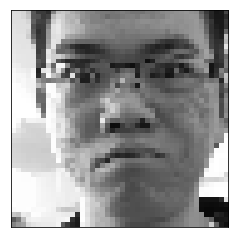

Neutral  0.99878
fps: 1.28
Processing video |==================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 900.000% (341, 341, 3)


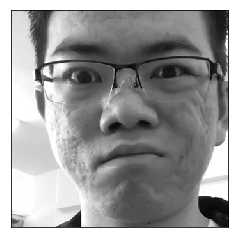

(341, 341)
(44, 44)
(44, 44, 3)


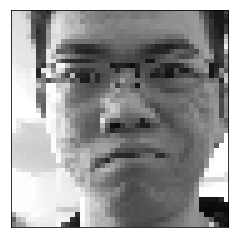

Neutral  0.98549
fps: 1.02
Processing video |=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 910.000% (341, 341, 3)


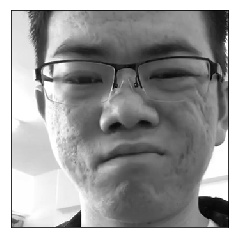

(341, 341)
(44, 44)
(44, 44, 3)


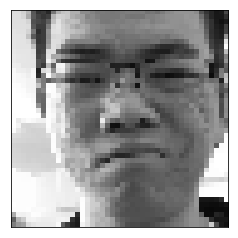

Angry  0.64325
fps: 1.37
Processing video |============================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 920.000% (287, 287, 3)


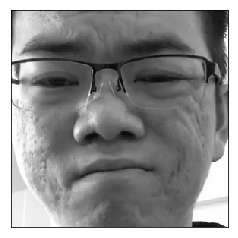

(287, 287)
(44, 44)
(44, 44, 3)


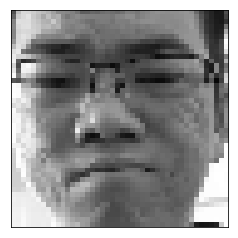

Neutral  0.94849
fps: 1.27
Processing video |=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 930.000% (287, 287, 3)


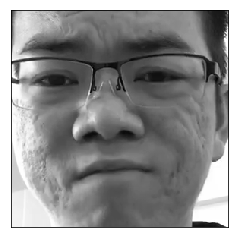

(287, 287)
(44, 44)
(44, 44, 3)


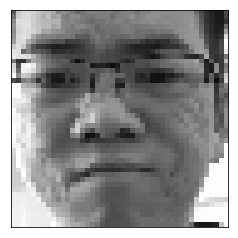

Neutral  0.92992
fps: 1.53
Processing video |======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 940.000% (287, 287, 3)


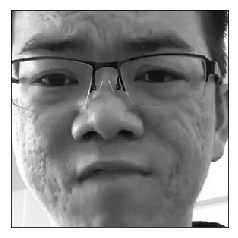

(287, 287)
(44, 44)
(44, 44, 3)


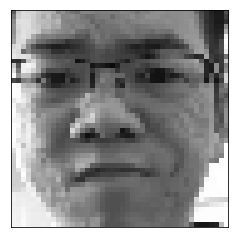

Neutral  0.95667
fps: 1.37
Processing video |===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 950.000% (287, 287, 3)


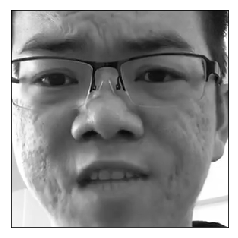

(287, 287)
(44, 44)
(44, 44, 3)


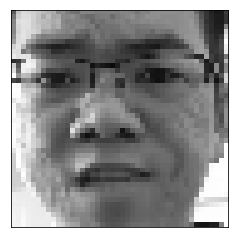

Neutral  0.99882
fps: 0.98
Processing video |================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 960.000% (341, 341, 3)


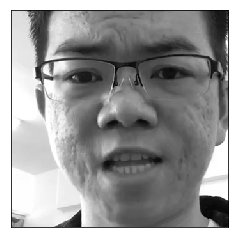

(341, 341)
(44, 44)
(44, 44, 3)


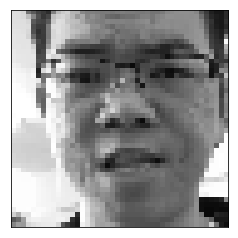

Neutral  0.98769
fps: 1.14
Processing video |=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 970.000% (341, 341, 3)


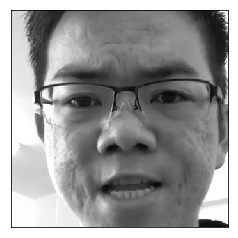

(341, 341)
(44, 44)
(44, 44, 3)


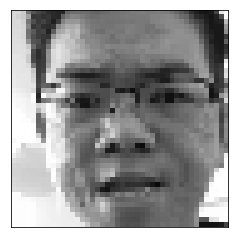

Neutral  0.99804
fps: 1.20
Processing video |==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 980.000% (341, 341, 3)


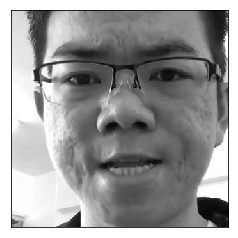

(341, 341)
(44, 44)
(44, 44, 3)


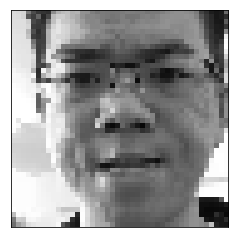

Neutral  0.99955
fps: 1.19
Processing video |===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 990.000% (341, 341, 3)


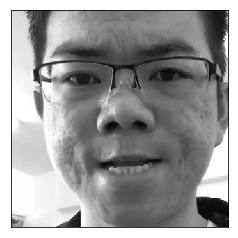

(341, 341)
(44, 44)
(44, 44, 3)


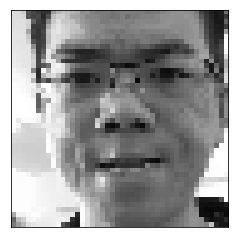

Neutral  0.97845
fps: 1.24
Processing video |====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1000.000% (341, 341, 3)


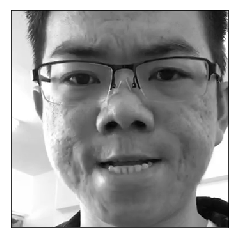

(341, 341)
(44, 44)
(44, 44, 3)


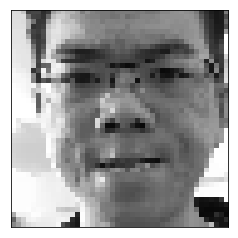

Neutral  0.61875
fps: 1.33
Processing video |=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1010.000% (341, 341, 3)


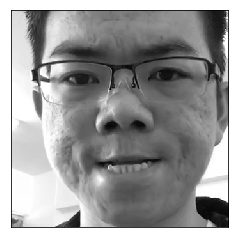

(341, 341)
(44, 44)
(44, 44, 3)


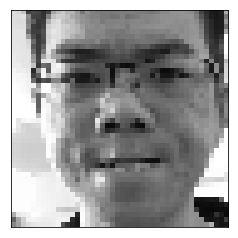

Happy  0.65987
fps: 0.93
Processing video |==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1020.000% (341, 341, 3)


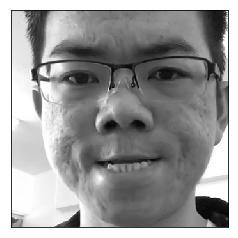

(341, 341)
(44, 44)
(44, 44, 3)


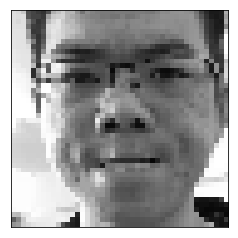

Neutral  0.90591
fps: 1.09
Processing video |===================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1030.000% (341, 341, 3)


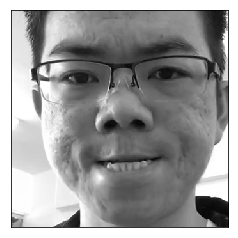

(341, 341)
(44, 44)
(44, 44, 3)


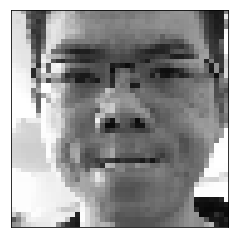

Neutral  0.54373
fps: 1.20
Processing video |========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1040.000% (341, 341, 3)


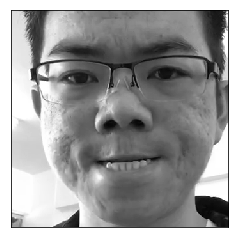

(341, 341)
(44, 44)
(44, 44, 3)


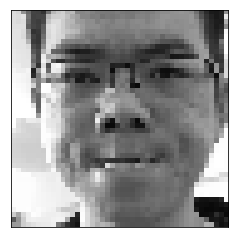

Happy  0.7665
fps: 1.46
Processing video |=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1050.000% (341, 341, 3)


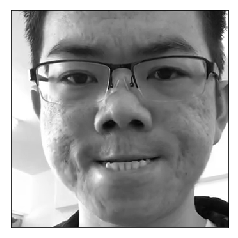

(341, 341)
(44, 44)
(44, 44, 3)


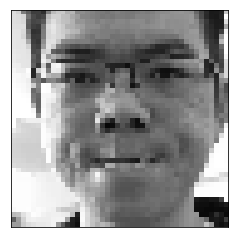

Happy  0.92794
fps: 1.43
Processing video |==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1060.000% (341, 341, 3)


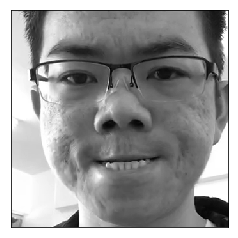

(341, 341)
(44, 44)
(44, 44, 3)


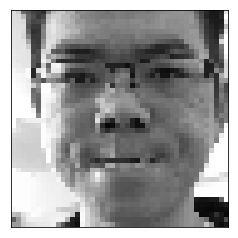

Happy  0.83138
fps: 0.88
Processing video |=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1070.000% (341, 341, 3)


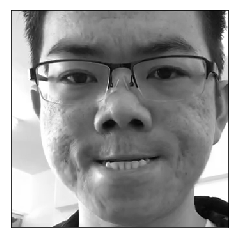

(341, 341)
(44, 44)
(44, 44, 3)


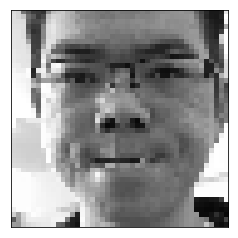

Happy  0.97252
fps: 1.06
Processing video |============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1080.000% (341, 341, 3)


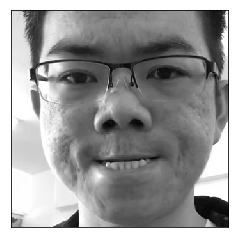

(341, 341)
(44, 44)
(44, 44, 3)


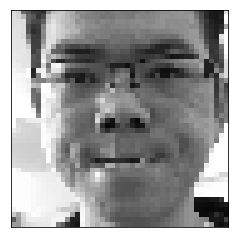

Happy  0.97014
fps: 1.12
Processing video |=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1090.000% (341, 341, 3)


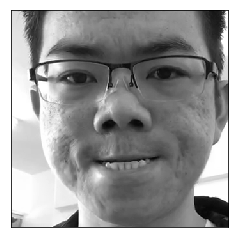

(341, 341)
(44, 44)
(44, 44, 3)


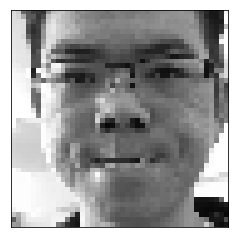

Neutral  0.7337
fps: 0.91
Processing video |======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1100.000% (341, 341, 3)


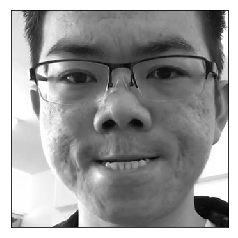

(341, 341)
(44, 44)
(44, 44, 3)


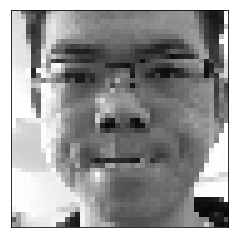

Neutral  0.55814
fps: 1.41
Processing video |===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1110.000% (341, 341, 3)


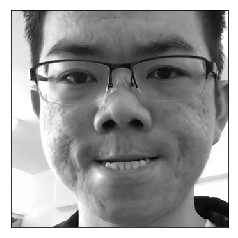

(341, 341)
(44, 44)
(44, 44, 3)


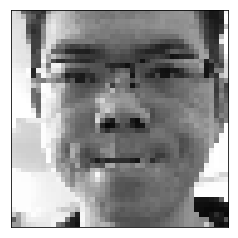

Happy  0.67694
fps: 1.69
Processing video |================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1120.000% (341, 341, 3)


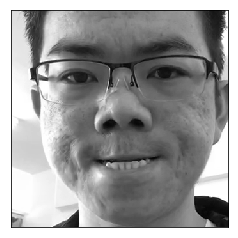

(341, 341)
(44, 44)
(44, 44, 3)


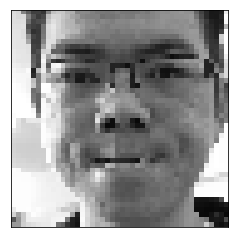

Happy  0.97966
fps: 1.44
Processing video |=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1130.000% (341, 341, 3)


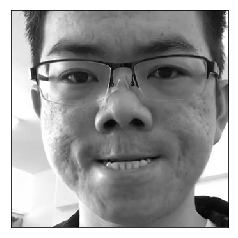

(341, 341)
(44, 44)
(44, 44, 3)


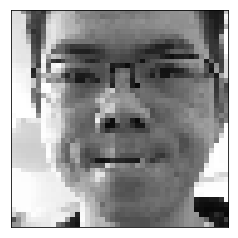

Happy  0.98953
fps: 1.70
Processing video |==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1140.000% (341, 341, 3)


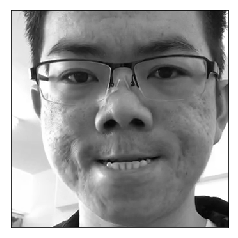

(341, 341)
(44, 44)
(44, 44, 3)


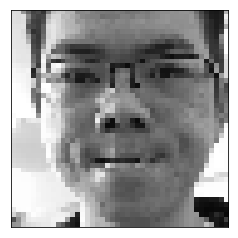

Happy  0.97758
fps: 1.14
Processing video |===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1150.000% (341, 341, 3)


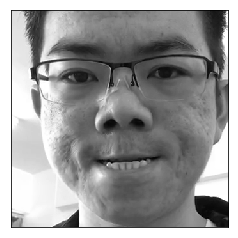

(341, 341)
(44, 44)
(44, 44, 3)


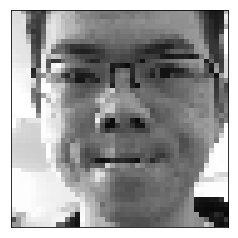

Happy  0.94443
fps: 1.32
Processing video |====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1160.000% (341, 341, 3)


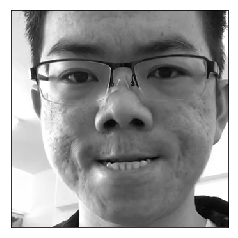

(341, 341)
(44, 44)
(44, 44, 3)


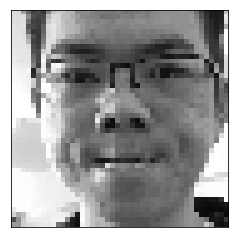

Happy  0.91526
fps: 1.50
Processing video |=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1170.000% (341, 341, 3)


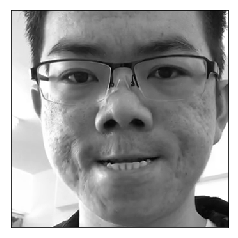

(341, 341)
(44, 44)
(44, 44, 3)


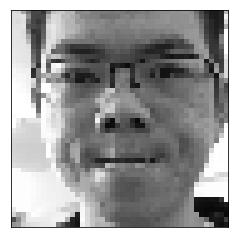

Neutral  0.6187
fps: 1.64
Processing video |==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1180.000% (341, 341, 3)


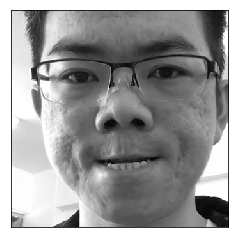

(341, 341)
(44, 44)
(44, 44, 3)


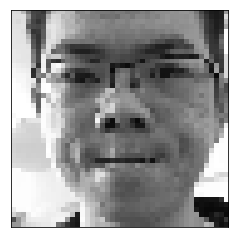

Neutral  0.90143
fps: 1.63
Processing video |===================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1190.000% (341, 341, 3)


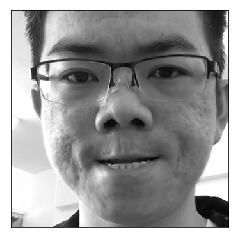

(341, 341)
(44, 44)
(44, 44, 3)


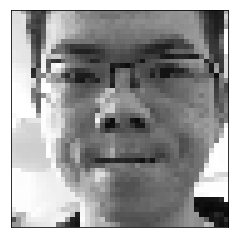

Neutral  0.92917
fps: 1.61
Processing video |========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1200.000% (341, 341, 3)


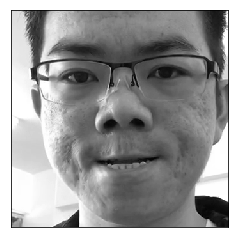

(341, 341)
(44, 44)
(44, 44, 3)


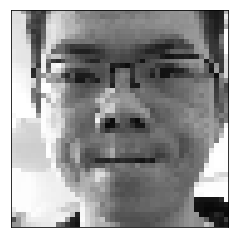

Neutral  0.90593
fps: 1.57
Processing video |=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1210.000% (341, 341, 3)


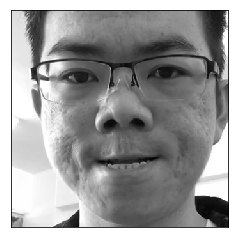

(341, 341)
(44, 44)
(44, 44, 3)


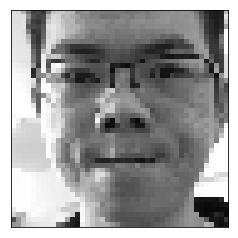

Neutral  0.93094
fps: 1.45
Processing video |==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1220.000% (341, 341, 3)


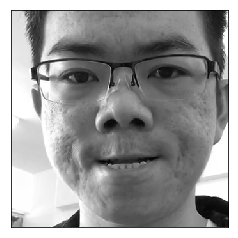

(341, 341)
(44, 44)
(44, 44, 3)


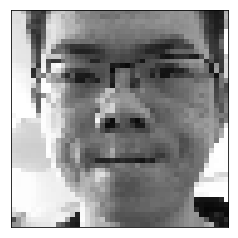

Neutral  0.79889
fps: 1.48
Processing video |=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1230.000% (341, 341, 3)


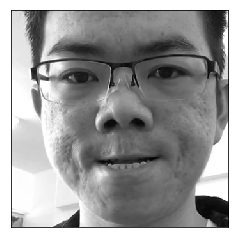

(341, 341)
(44, 44)
(44, 44, 3)


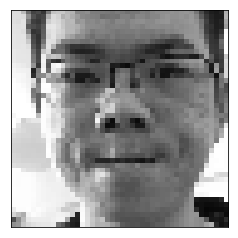

Neutral  0.90098
fps: 1.04
Processing video |============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1240.000% (341, 341, 3)


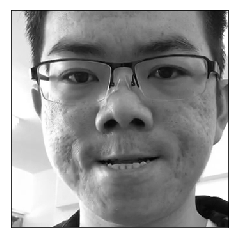

(341, 341)
(44, 44)
(44, 44, 3)


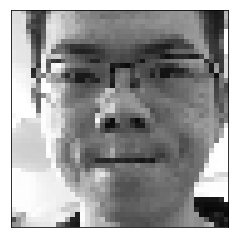

Neutral  0.94598
fps: 1.82
Processing video |=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1250.000% (341, 341, 3)


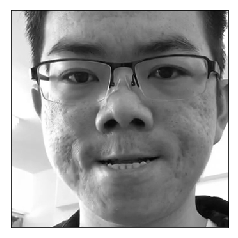

(341, 341)
(44, 44)
(44, 44, 3)


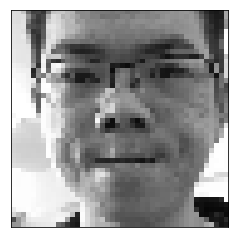

Neutral  0.91339
fps: 1.57
Processing video |======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1260.000% (341, 341, 3)


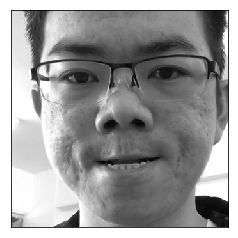

(341, 341)
(44, 44)
(44, 44, 3)


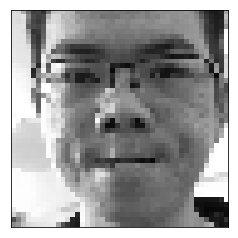

Neutral  0.99067
fps: 1.62
Processing video |===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1270.000% (341, 341, 3)


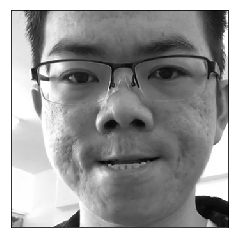

(341, 341)
(44, 44)
(44, 44, 3)


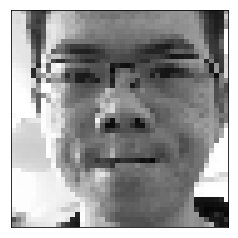

Neutral  0.98593
fps: 1.21
Processing video |================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1280.000% (341, 341, 3)


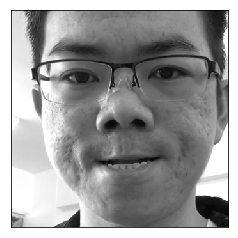

(341, 341)
(44, 44)
(44, 44, 3)


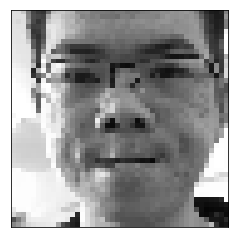

Neutral  0.9738
fps: 1.37
Processing video |=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1290.000% (341, 341, 3)


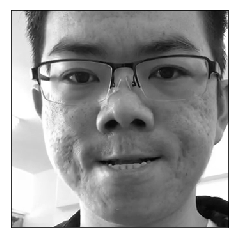

(341, 341)
(44, 44)
(44, 44, 3)


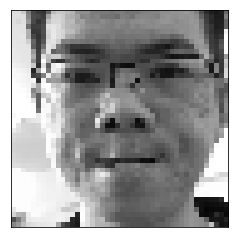

Neutral  0.97189
fps: 1.27
Processing video |==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1300.000% (341, 341, 3)


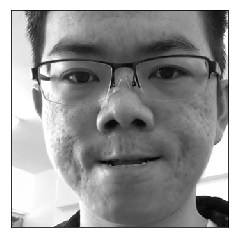

(341, 341)
(44, 44)
(44, 44, 3)


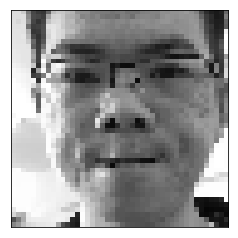

Neutral  0.9902
fps: 1.08
Processing video |===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1310.000% (341, 341, 3)


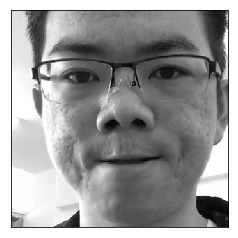

(341, 341)
(44, 44)
(44, 44, 3)


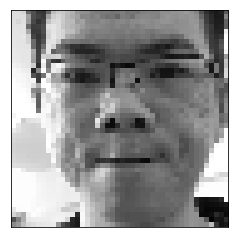

Neutral  0.99478
fps: 1.39
Processing video |====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1320.000% (341, 341, 3)


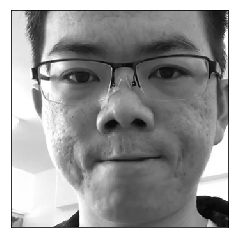

(341, 341)
(44, 44)
(44, 44, 3)


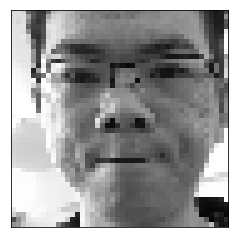

Neutral  0.99938
fps: 1.06
Processing video |=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1330.000% (341, 341, 3)


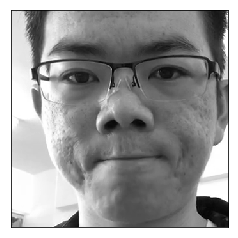

(341, 341)
(44, 44)
(44, 44, 3)


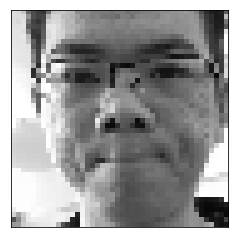

Neutral  0.99925
fps: 1.06
Processing video |==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1340.000% (341, 341, 3)


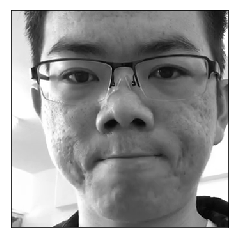

(341, 341)
(44, 44)
(44, 44, 3)


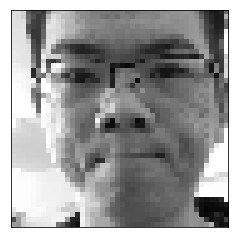

Neutral  0.71021
fps: 1.18
Processing video |===================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1350.000% (341, 341, 3)


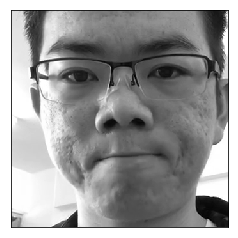

(341, 341)
(44, 44)
(44, 44, 3)


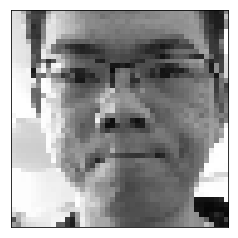

Neutral  0.99919
fps: 1.33
Processing video |========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1360.000% (341, 341, 3)


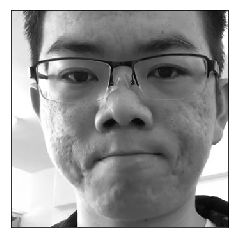

(341, 341)
(44, 44)
(44, 44, 3)


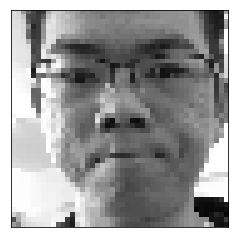

Neutral  0.99997
fps: 1.20
Processing video |=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1370.000% (341, 341, 3)


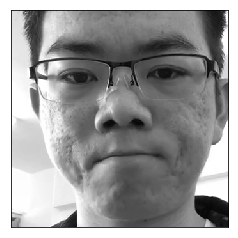

(341, 341)
(44, 44)
(44, 44, 3)


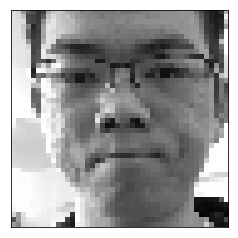

Neutral  0.9991
fps: 1.42
Processing video |==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================| 1380.000% 

In [3]:
# raw_img = io.imread('/home/ysz/Mask_RCNN/data/pytoch/Expression/demo/1.png')
video = '/home/ysz/Mask_RCNN/data/pytoch/Expression5/demo/test.mp4'
detector = dlib.get_frontal_face_detector()

net = DenseNet()
checkpoint = torch.load(os.path.join('/home/ysz/Mask_RCNN/data/pytoch/Expression5/models/FER2013_DenseNet', 'PrivateTest_model.t7'))
net.load_state_dict(checkpoint['net'])
net.cuda()
net.eval()

cap = cv.VideoCapture(video)
ret, frame = cap.read()
height, width = frame.shape[:2]

fourcc = cv.VideoWriter_fourcc(*'MPEG')
out = cv.VideoWriter('/home/ysz/Mask_RCNN/data/pytoch/Expression5/demo/output.avi', fourcc, 24.0, (width, width))

start = time.time()
frame_idx = 0
num_frames = 10
total_delay = 0
pb = ProgressBar(total=100, prefix='Processing video', suffix='', decimals=3, length=50, fill='=')

class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# capture frames from the camera
while ret:
    frame = frame[100:100 + width, :]
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    gray = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)
    faces = detector(gray, 1)
    
    for rect in faces:
        (x, y, w, h) = rect_to_bb(rect)
        x1, x2, y1, y2 = apply_offsets((x, y, w, h), (10, 10))
        gray_face = gray[y1:y2, x1:x2]
        
        print (gray_face.shape)
        plt.imshow(gray_face)
        plt.xticks([]), plt.yticks([])    # to hide tick values on X and Y axis
        plt.show()
       
        img = cv.resize(gray_face, (44, 44))

        print (img.shape)
        plt.imshow(img)
        plt.xticks([]), plt.yticks([])    # to hide tick values on X and Y axis
        plt.show()
        
        img = Image.fromarray(img)
        inputs = transform_test(img)

        c, h, w = np.shape(inputs)

        inputs = inputs.view(-1, c, h, w)

        inputs = inputs.cuda()
        inputs = Variable(inputs)
        
        outputs = net(inputs)
        
        score = F.softmax(outputs)
        _, predicted = torch.max(outputs.data, 0)
        
        emotion = class_names[int(predicted.cpu().numpy())]
        prob = max(score.data.cpu().numpy())
        color = get_color(emotion, prob)
        
        
        text = emotion + '  ' + str(round(prob, 5))
        
        print (text)
        
        draw_bounding_box(image=frame, coordinates=(x1, y1, x2 - x1, y2 - y1), color=color)
        draw_text(image=frame, coordinates=(x1, y1, x2 - x1, y2 - y1), color=color, text=text)
        out.write(frame)
        
    end = time.time()
    seconds = end - start
    total_delay += seconds
    fps = 1.0 / seconds
    draw_str(frame, (20, 20), 'frame_idx: %d, fps: %.2f' % (frame_idx, fps))
    print('fps: %.2f' % fps)
    pb.print_progress_bar(frame_idx * 100 / num_frames)
    
    frame_idx += 1
    start = time.time()

    ret, frame = cap.read()

In [4]:
print('num_frames: {}'.format(num_frames))
print('avg fps: {}'.format(str(num_frames/total_delay)))

cap.release()
out.release()

num_frames: 10
avg fps: 0.09051268881895014
